#### Data source:
Lee M, Teber ET, Holmes O, Nones K, Patch AM, Dagg RA, Lau LMS, Lee JH, Napier CE, Arthur JW, Grimmond SM, Hayward NK, Johansson PA, Mann GJ, Scolyer RA, Wilmott JS, Reddel RR, Pearson JV, Waddell N, Pickett HA. 
**Telomere sequence content can be used to determine ALT activity in tumours.**
_Nucleic Acids Res._ 2018 Jun 1;46(10):4903-4918.

# STEP 1: Preprocessing

## Load data

In [2]:
import pandas as pd

# Load data
data = pd.read_csv("data/telomere_ALT/telomere.csv", sep='\t')
data.head(10)    # Show first ten samples

,TTAGGG,ATAGGG,CTAGGG,GTAGGG,TAAGGG,TCAGGG,TGAGGG,TTCGGG,TTGGGG,TTTGGG,...,TTACGG,TTATGG,TTAGAG,TTAGCG,TTAGTG,TTAGGA,TTAGGC,TTAGGT,rel_TL,TMM
0,94.846,0.019,0.430,0.422,0.216,0.544,1.762,0.535,0.338,0.068,...,0.028,0.118,0.153,0.000,0.049,0.060,0.033,0.089,-0.89,-
1,94.951,0.011,0.241,0.491,0.223,0.317,1.351,0.818,0.702,0.090,...,0.024,0.125,0.080,0.024,0.035,0.155,0.030,0.093,-0.39,-
2,94.889,0.043,0.439,0.478,0.355,0.316,1.151,0.625,0.313,0.079,...,0.041,0.253,0.195,0.032,0.043,0.161,0.047,0.185,-1.66,-
3,94.202,0.017,0.252,0.509,0.396,0.548,1.877,0.856,0.440,0.097,...,0.053,0.110,0.125,0.000,0.043,0.069,0.029,0.110,-1.73,-
4,96.368,0.011,0.078,0.131,0.015,0.306,1.525,1.165,0.126,0.000,...,0.014,0.099,0.022,0.000,0.019,0.026,0.009,0.014,0.21,-
5,98.843,0.001,0.112,0.179,0.000,0.073,0.285,0.280,0.094,0.000,...,0.009,0.011,0.045,0.000,0.002,0.014,0.010,0.003,0.56,-
6,97.041,0.002,0.209,0.324,0.200,0.391,0.640,0.353,0.257,0.041,...,0.014,0.066,0.089,0.000,0.017,0.086,0.016,0.041,0.01,-
7,93.687,0.034,0.444,0.651,0.463,0.655,1.347,0.836,0.550,0.133,...,0.038,0.136,0.191,0.046,0.034,0.160,0.033,0.099,-0.79,-
8,97.500,0.015,0.149,0.264,0.078,0.238,0.917,0.184,0.206,0.038,...,0.019,0.086,0.060,0.000,0.029,0.045,0.024,0.031,-0.83,-
9,97.110,0.001,0.223,0.303,0.166,0.293,0.729,0.382,0.253,0.026,...,0.026,0.036,0.148,0.000,0.017,0.059,0.019,0.029,-0.02,-


## Split data into training and test sets

In [3]:
from sklearn import model_selection

num_row = data.shape[0]     # number of samples in the dataset
num_col = data.shape[1]     # number of features in the dataset (plus the label column)

X = data.iloc[:, 0: num_col-1]    # feature columns
y = data['TMM']                   # label column

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, 
                                     test_size=0.2,      # reserve 20 percent data for testing
                                     stratify=y,         # stratified sampling
                                     random_state=0)

In [4]:
X_train.shape

(128, 20)

In [5]:
X_test.shape

(33, 20)

In [6]:
y_train.value_counts()

-    96
+    32
Name: TMM, dtype: int64

In [7]:
y_test.value_counts()

-    25
+     8
Name: TMM, dtype: int64

# STEP 2: Learning

## Train a Random Forest classifier

In [8]:
import numpy as np
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(
    n_estimators = 10,           # 10 random trees in the forest
    criterion = 'entropy',       # use entropy as the measure of uncertainty
    max_depth = 3,               # maximum depth of each tree is 3
    min_samples_split = 5,       # generate a split only when there are at least 5 samples at current node
    class_weight = 'balanced',   # class weight is inversely proportional to class frequencies
    random_state = 0)

k = 3   # number of folds

# split data into k folds
kfold = model_selection.StratifiedKFold(
    n_splits = k,
    shuffle = True,
    random_state = 0)

cv = list(kfold.split(X_train, y_train))    # indices of samples in each fold

In [9]:
for j, (train_idx, val_idx) in enumerate(cv):
    print('validation fold %d:' % (j+1))
    print(val_idx)

validation fold 1:
[  3   6   7  10  12  13  20  24  31  34  36  37  39  42  45  56  57  59
  62  63  69  70  71  75  77  81  83  88  90  91  95  97 100 104 105 106
 107 108 111 113 116 117 127]
validation fold 2:
[  0   2   4   8   9  11  14  16  17  18  22  25  26  29  33  38  40  43
  46  48  51  53  54  55  65  66  68  72  73  76  78  80  82  84  93  98
 103 112 114 119 120 121 123]
validation fold 3:
[  1   5  15  19  21  23  27  28  30  32  35  41  44  47  49  50  52  58
  60  61  64  67  74  79  85  86  87  89  92  94  96  99 101 102 109 110
 115 118 122 124 125 126]


## Compute classifier accuracy

In [10]:
accuracy = []

# Compute classifier's accuracy on each fold
for j, (train_idx, val_idx) in enumerate(cv):
    rf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    accuracy_per_fold = rf.score(X_train.iloc[val_idx], y_train.iloc[val_idx])
    accuracy.append(accuracy_per_fold)
    print('Fold %d accuracy: %.3f' % (j+1, accuracy_per_fold))

print('Average accuracy: %.3f' % np.mean(accuracy))

Fold 1 accuracy: 0.860
Fold 2 accuracy: 0.860
Fold 3 accuracy: 0.857
Average accuracy: 0.859


## Plot receiver operating characteristic (ROC) curve

In [11]:
from matplotlib import pyplot as plt
from sklearn import metrics

fpr = dict()       # false positive rate
tpr = dict()       # true positive rate
auroc = dict()     # area under the ROC curve (AUROC)

# Compute an ROC curve (with respect to the positive class) for each fold
# Compute AUROC for each fold
for j, (train_idx, val_idx) in enumerate(cv):
    rf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = rf.predict_proba(X_train.iloc[val_idx])
    fpr[j], tpr[j], _ = metrics.roc_curve(y_train.iloc[val_idx], y_prob[:, 0], pos_label='+')
    auroc[j] = metrics.auc(fpr[j], tpr[j])

# Compute an average ROC curve for all folds
fpr['avg'] = np.unique(np.concatenate([fpr[j] for j in range(k)]))
tpr['avg'] = np.zeros_like(fpr['avg'])

for j in range(k):
    tpr['avg'] += np.interp(fpr['avg'], fpr[j], tpr[j])

tpr['avg'] /= k

# Compute AUROC of the average ROC curve
auroc['avg'] = metrics.auc(fpr['avg'], tpr['avg'])

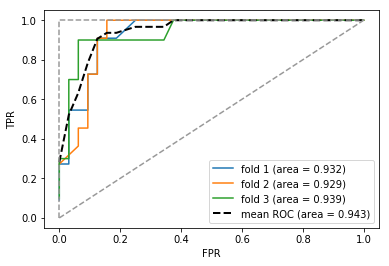

In [12]:
# Plot the ROC curves
for j in range(k):
    plt.plot(fpr[j], tpr[j], label='fold %d (area = %.3f)' % (j+1, auroc[j]))

plt.plot(fpr['avg'], tpr['avg'], 'k--', label='mean ROC (area = %.3f)' % auroc['avg'], lw=2)
plt.plot([0,1], [0,1], linestyle='--', color=(0.6, 0.6, 0.6))     # ROC curve for a random classifier
plt.plot([0,0,1], [0,1,1], linestyle='--', color=(0.6, 0.6, 0.6)) # ROC curve for a perfect classifier

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')

plt.show()

## Plot precision-recall (PR) curve

In [13]:
precision_plus = dict()
recall_plus = dict()
auprc_plus = dict()

precision_minus = dict()
recall_minus = dict()
auprc_minus = dict()

# Compute PR curves (with respect to the positive and negative classes) for each fold
# Compute AUPRC for each fold
for j, (train_idx, val_idx) in enumerate(cv):
    rf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = rf.predict_proba(X_train.iloc[val_idx])
    precision_plus[j], recall_plus[j], _ = metrics.precision_recall_curve(y_train.iloc[val_idx], y_prob[:, 0], pos_label='+')
    precision_minus[j], recall_minus[j], _ = metrics.precision_recall_curve(y_train.iloc[val_idx], y_prob[:, 1], pos_label='-')
    auprc_plus[j] = metrics.auc(recall_plus[j], precision_plus[j])
    auprc_minus[j] = metrics.auc(recall_minus[j], precision_minus[j])

# Compute average PR curves for all folds
recall_plus['avg'] = np.unique(np.concatenate([recall_plus[j] for j in range(k)]))
recall_minus['avg'] = np.unique(np.concatenate([recall_minus[j] for j in range(k)]))
precision_plus['avg'] = np.zeros_like(recall_plus['avg'])
precision_minus['avg'] = np.zeros_like(recall_minus['avg'])

for j in range(k):
    precision_plus['avg'] += np.interp(recall_plus['avg'], np.flip(recall_plus[j], 0), np.flip(precision_plus[j], 0))
    precision_minus['avg'] += np.interp(recall_minus['avg'], np.flip(recall_minus[j], 0), np.flip(precision_minus[j], 0))

precision_plus['avg'] /= k
precision_minus['avg'] /= k

# Compute AUPRCs for the average curves
auprc_plus['avg'] = metrics.auc(recall_plus['avg'], precision_plus['avg'])
auprc_minus['avg'] = metrics.auc(recall_minus['avg'], precision_minus['avg'])

### PR curve w.r.t the positive class

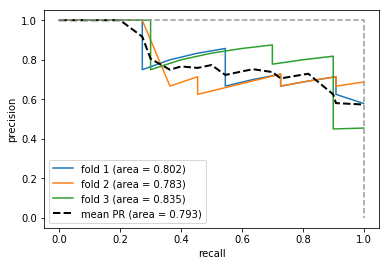

In [14]:
# Plot the PR curves for the positive class
for j in range(k):
    plt.plot(recall_plus[j], precision_plus[j], label='fold %d (area = %.3f)' % (j+1, auprc_plus[j]))

plt.plot(recall_plus['avg'], precision_plus['avg'], 'k--', label='mean PR (area = %.3f)' % auprc_plus['avg'], lw=2)
plt.plot([0,1,1], [1,1,0], linestyle='--', color=(0.6, 0.6, 0.6))   # PR curve for a perfect classifier

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')

plt.show()

### PR curve w.r.t the negative class

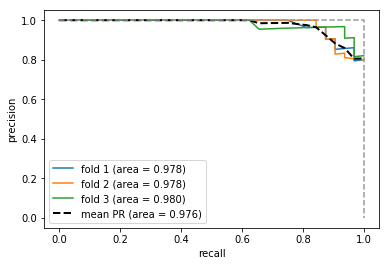

In [15]:
# Plot the PR curves for the negative class
for j in range(k):
    plt.plot(recall_minus[j], precision_minus[j], label='fold %d (area = %.3f)' % (j+1, auprc_minus[j]))

plt.plot(recall_minus['avg'], precision_minus['avg'], 'k--', label='mean PR (area = %.3f)' % auprc_minus['avg'], lw=2)
plt.plot([0,1,1], [1,1,0], linestyle='--', color=(0.6, 0.6, 0.6))   # PR curve for a perfect classifier

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')

plt.show()

## Plot confusion matrix

In [16]:
# Compute a 2x2 confusion matrix
confusion_matrix = np.zeros([2, 2])

for j, (train_idx, val_idx) in enumerate(cv):
    rf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y = rf.predict(X_train.iloc[val_idx])
    confusion_matrix += metrics.confusion_matrix(y_train.iloc[val_idx], y)

# Average over all folds
confusion_matrix /= k
confusion_matrix = np.around(confusion_matrix, decimals=3)

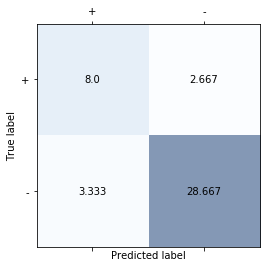

In [17]:
# Plot the confusion matrix
plt.matshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.5)
plt.xticks(np.arange(2), ('+', '-'))
plt.yticks(np.arange(2), ('+', '-'))

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

# STEP 3: Evaluation

In [18]:
# Refit the classifier using the full training set
rf = rf.fit(X_train, y_train)

### Compute classifier accuracy on the test set

In [19]:
# Compute classifier's accuracy on the test set
test_accuracy = rf.score(X_test, y_test)
print('Test accuracy: %.3f' % test_accuracy)

Test accuracy: 0.848


### Generate plots for the test set

In [20]:
# Predict labels for the test set
y = rf.predict(X_test)             # Solid prediction
y_prob = rf.predict_proba(X_test)  # Soft prediction

# Compute the ROC and PR curves for the test set
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob[:, 0], pos_label='+')
precision_plus, recall_plus, _ = metrics.precision_recall_curve(y_test, y_prob[:, 0], pos_label='+')
precision_minus, recall_minus, _ = metrics.precision_recall_curve(y_test, y_prob[:, 1], pos_label='-')

# Compute the AUROC and AUPRCs for the test set
auroc = metrics.auc(fpr, tpr)
auprc_plus = metrics.auc(recall_plus, precision_plus)
auprc_minus = metrics.auc(recall_minus, precision_minus)

# Compute the confusion matrix for the test set
cm = metrics.confusion_matrix(y_test, y)

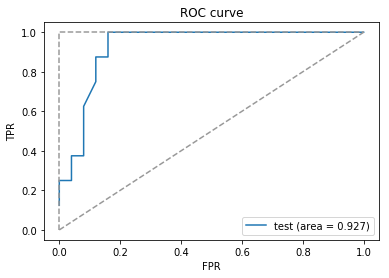

In [21]:
# Plot the ROC curve for the test set
plt.plot(fpr, tpr, label='test (area = %.3f)' % auroc)
plt.plot([0,1], [0,1], linestyle='--', color=(0.6, 0.6, 0.6))
plt.plot([0,0,1], [0,1,1], linestyle='--', color=(0.6, 0.6, 0.6))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC curve')

plt.show()

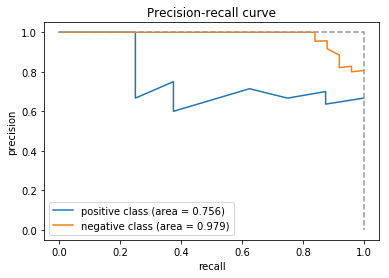

In [22]:
# Plot the PR curve for the test set
plt.plot(recall_plus, precision_plus, label='positive class (area = %.3f)' % auprc_plus)
plt.plot(recall_minus, precision_minus, label='negative class (area = %.3f)' % auprc_minus)

plt.plot([0,1,1], [1,1,0], linestyle='--', color=(0.6, 0.6, 0.6))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')
plt.title('Precision-recall curve')

plt.show()

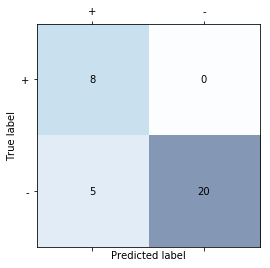

In [23]:
# Plot the confusion matrix for the test set
plt.matshow(cm, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.5)
plt.xticks(np.arange(2), ('+', '-'))
plt.yticks(np.arange(2), ('+', '-'))

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

## STEP 4: Prediction

In [31]:
# Enter unlabeled data for prediction
newdata = pd.read_csv("data/telomere_ALT/telomere_new.csv", sep='\t')
newdata.head(6)

,TTAGGG,ATAGGG,CTAGGG,GTAGGG,TAAGGG,TCAGGG,TGAGGG,TTCGGG,TTGGGG,TTTGGG,TTAAGG,TTACGG,TTATGG,TTAGAG,TTAGCG,TTAGTG,TTAGGA,TTAGGC,TTAGGT,rel_TL
0,98.621,0.002,0.029,0.184,0.000,0.817,0.130,0.079,0.065,0.000,0.013,0.007,0.010,0.008,0.000,0.007,0.016,0.009,0.003,2.00
1,94.300,0.033,0.448,0.651,0.338,0.462,1.052,0.678,0.628,0.110,0.263,0.061,0.120,0.191,0.053,0.056,0.328,0.046,0.182,-1.01
2,98.666,0.002,0.073,0.163,0.000,0.076,0.334,0.415,0.075,0.000,0.023,0.010,0.014,0.053,0.000,0.009,0.065,0.013,0.007,0.81
3,97.384,0.008,0.275,0.425,0.186,0.277,0.548,0.156,0.185,0.012,0.113,0.034,0.110,0.095,0.000,0.036,0.081,0.036,0.037,0.00
4,96.525,0.026,0.204,0.230,0.209,0.417,0.934,0.197,0.397,0.168,0.193,0.026,0.070,0.093,0.003,0.034,0.158,0.050,0.066,-1.04
5,96.150,0.067,0.273,0.307,0.252,0.355,1.061,0.275,0.444,0.078,0.157,0.020,0.092,0.108,0.021,0.022,0.219,0.033,0.067,-0.13


In [32]:
# predict labels
y_new = rf.predict(newdata)

y_new

array(['+', '-', '+', '-', '-', '-'], dtype=object)